In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'athlete_events.csv')

In [3]:
df2 = pd.read_csv(r'noc_regions.csv')

## Cleaning

### NaN values

In [4]:
df2.loc[pd.isna(df2.region)]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [5]:
df2.loc[df2.NOC == 'TUV', ['region']] = 'Tuvalu'
df2.loc[df2.NOC == 'ROT', ['region']] = 'Refugee Olympic Team'

### Deleting Columns

In [6]:
df = df.drop('Games', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 29.0+ MB


### Deleting Duplicates

In [8]:
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 1251 to 270200
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1997 non-null   int64  
 1   Name    1997 non-null   object 
 2   Sex     1997 non-null   object 
 3   Age     1746 non-null   float64
 4   Height  41 non-null     float64
 5   Weight  45 non-null     float64
 6   Team    1997 non-null   object 
 7   NOC     1997 non-null   object 
 8   Year    1997 non-null   int64  
 9   Season  1997 non-null   object 
 10  City    1997 non-null   object 
 11  Sport   1997 non-null   object 
 12  Event   1997 non-null   object 
 13  Medal   22 non-null     object 
dtypes: float64(3), int64(2), object(9)
memory usage: 234.0+ KB


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal


### Irrelevant sport and events

In [11]:
kind_sport = df.Sport.unique()
kind_sport

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

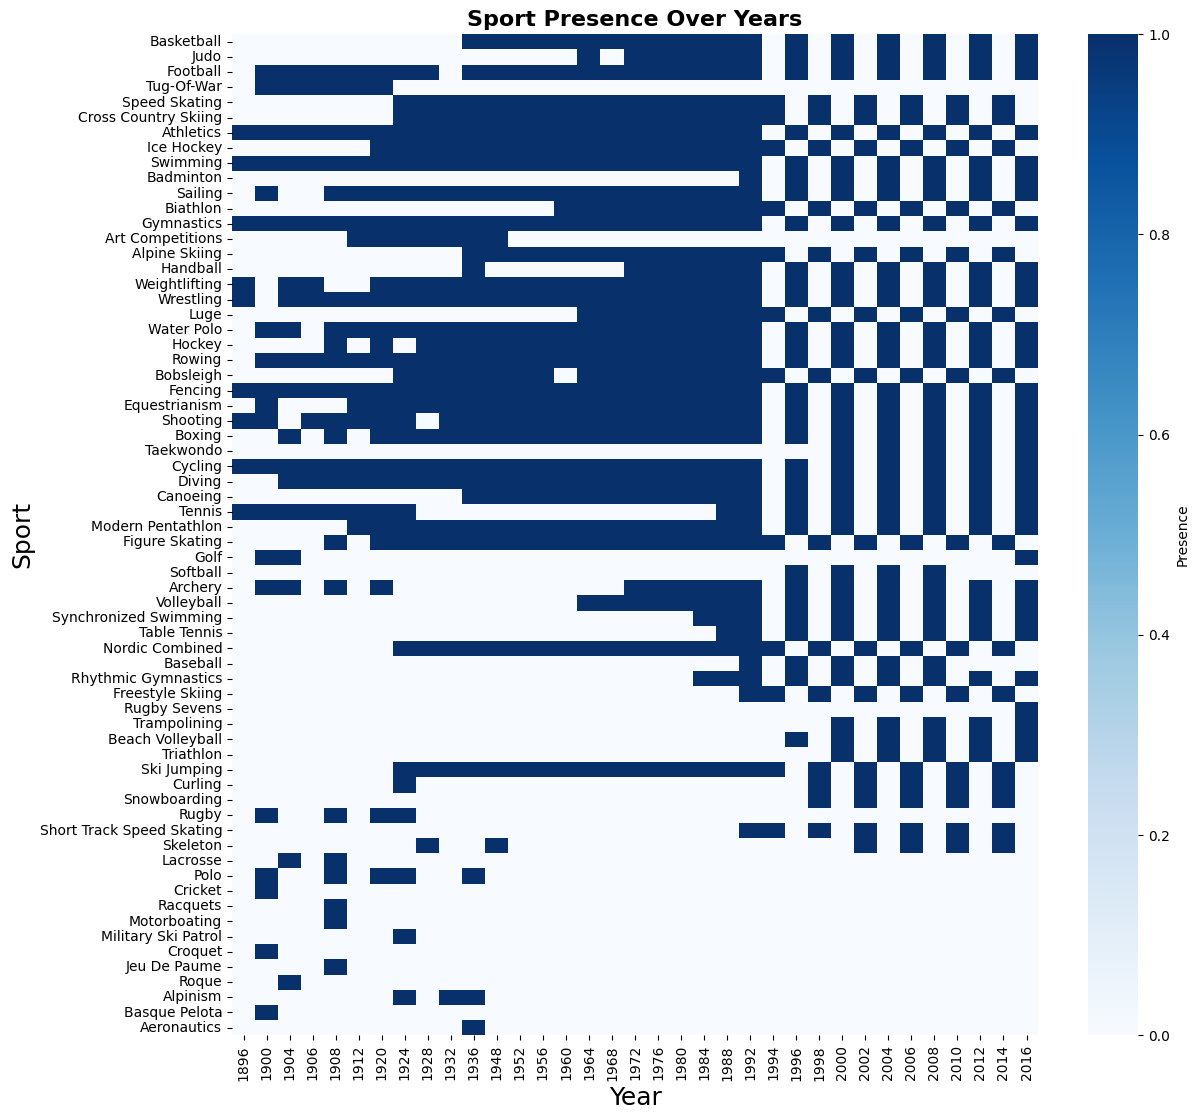

In [12]:
year_sort = sorted(df.Year.unique())

presence_df = pd.DataFrame(0, index=kind_sport, columns=year_sort)

for year in presence_df.columns:
    presence_df.loc[df['Sport'].loc[df['Year'] == year], year] = 1

plt.figure(figsize=(13, 13))
sns.heatmap(presence_df, cmap='Blues', cbar_kws={'label': 'Presence'})

plt.title('Sport Presence Over Years', fontsize=16, color='black', fontweight='bold')
plt.xlabel('Year', color='black', fontsize=18)
plt.ylabel('Sport', color='black', fontsize=18)

plt.show()

In [13]:
sport_not_relevant = ['Tug-Of-War', 'Art Competitions', 'Rugby', 'Lacrosse', 'Polo', 'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol', 'Croquet', 'Jeu De Paume', 'Roque', 'Alpinism', 'Basque Pelota', 'Aeronautics']

for i in sport_not_relevant:
    df = df.drop(df.loc[df.Sport == i].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266842 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      266842 non-null  int64  
 1   Name    266842 non-null  object 
 2   Sex     266842 non-null  object 
 3   Age     258055 non-null  float64
 4   Height  210787 non-null  float64
 5   Weight  208095 non-null  float64
 6   Team    266842 non-null  object 
 7   NOC     266842 non-null  object 
 8   Year    266842 non-null  int64  
 9   Season  266842 non-null  object 
 10  City    266842 non-null  object 
 11  Sport   266842 non-null  object 
 12  Event   266842 non-null  object 
 13  Medal   39117 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 30.5+ MB


### Cleaning weight column


In [14]:
df.Weight = df.Weight.round()

## Data Exploration

### Creating dateframes for my Exploration

In [15]:
df_stats = pd.DataFrame(df[['Sex', 'Age', 'Height', 'Weight', 'Event', 'Medal']])

In [16]:
filt = df_stats['Medal'].notna()

age_medal_df = df.loc[filt].groupby('Age').agg(Gold = ('Medal', lambda x: (x == 'Gold').sum()), 
                                               Silver = ('Medal', lambda x: (x == 'Silver').sum()), 
                                               Bronze = ('Medal', lambda x: (x == 'Bronze').sum()), 
                                               Medal_sum = ('Medal', 'count')).reset_index()



In [17]:
age_medal_df = age_medal_df.loc[(age_medal_df.Gold > 0) & (age_medal_df.Silver > 0) & (age_medal_df.Bronze > 0)]

In [18]:
age_medal_df.head()

,Age,Gold,Silver,Bronze,Medal_sum
3,13.0,7,7,2,16
4,14.0,27,29,18,74
5,15.0,73,67,54,194
6,16.0,116,129,105,350
7,17.0,199,163,170,532


In [19]:
df_stats

,Sex,Age,Height,Weight,Event,Medal
0,M,24.0,180.0,80.0,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,Judo Men's Extra-Lightweight,NaN
2,M,24.0,NaN,NaN,Football Men's Football,NaN
4,F,21.0,185.0,82.0,Speed Skating Women's 500 metres,NaN
5,F,21.0,185.0,82.0,"Speed Skating Women's 1,000 metres",NaN
...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Luge Mixed (Men)'s Doubles,NaN
271112,M,27.0,176.0,59.0,"Ski Jumping Men's Large Hill, Individual",NaN
271113,M,27.0,176.0,59.0,"Ski Jumping Men's Large Hill, Team",NaN
271114,M,30.0,185.0,96.0,Bobsleigh Men's Four,NaN


### Working on season table


In [20]:
years_winter_sort = sorted(df.Year.loc[df.Season == 'Winter'].unique())
years_summer_sort = sorted(df.Year.loc[df.Season == 'Summer'].unique())

In [21]:
df.loc[df.Season == 'Winter'].count()

ID        48519
Name      48519
Sex       48519
Age       48248
Height    40250
Weight    39543
Team      48519
NOC       48519
Year      48519
Season    48519
City      48519
Sport     48519
Event     48519
Medal      5662
dtype: int64

In [22]:
df.loc[df.Season == 'Summer'].count()

ID        218323
Name      218323
Sex       218323
Age       209807
Height    170537
Weight    168552
Team      218323
NOC       218323
Year      218323
Season    218323
City      218323
Sport     218323
Event     218323
Medal      33455
dtype: int64

In [23]:
kind_sport_winter_sort = np.array(sorted(df.Sport.loc[df.Season == 'Winter'].unique()))
kind_sport_summer_sort = np.array(sorted(df.Sport.loc[df.Season == 'Summer'].unique()))

In [24]:
sport_winter_years_df = df[df.Sport.isin(kind_sport_winter_sort)]
sport_winter_years_df.Sport.unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton'],
      dtype=object)

In [25]:
sport_summer_years_df = df[df.Sport.isin(kind_sport_summer_sort)]
sport_summer_years_df.Sport.unique()

array(['Basketball', 'Judo', 'Football', 'Athletics', 'Ice Hockey',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics', 'Handball',
       'Weightlifting', 'Wrestling', 'Water Polo', 'Hockey', 'Rowing',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon'], dtype=object)

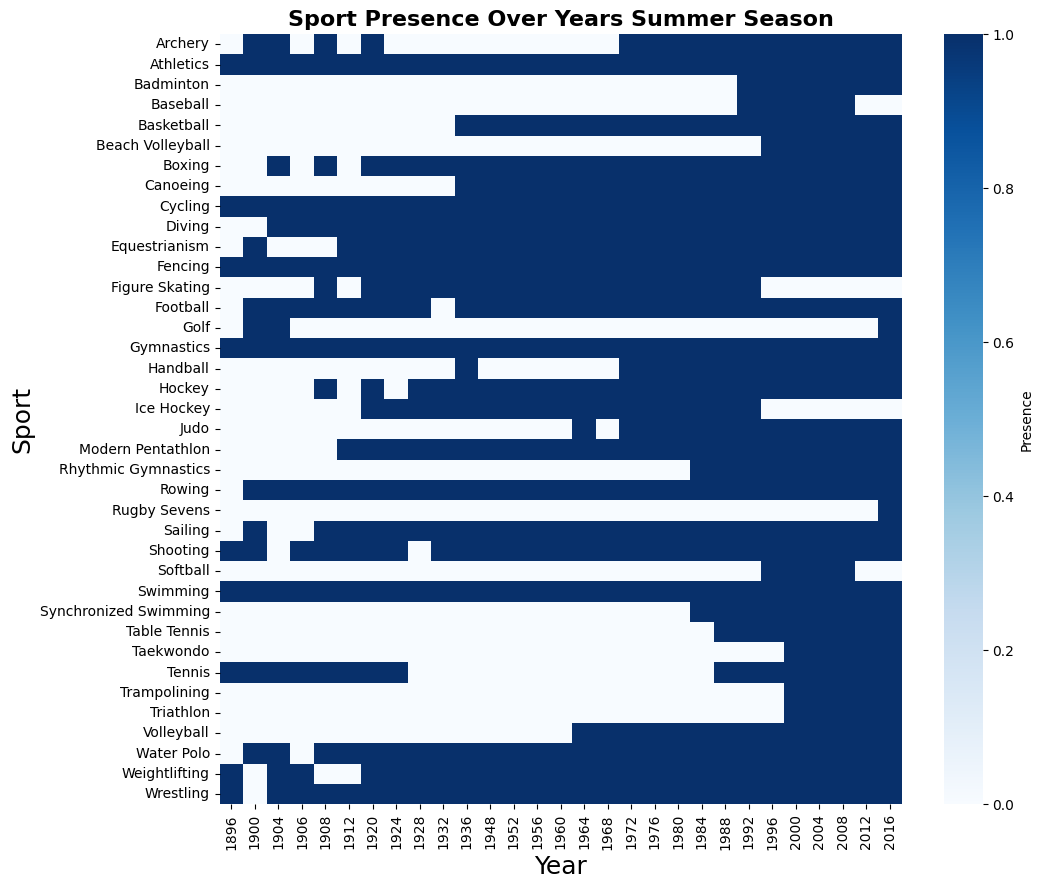

In [26]:
winter_presence_df = pd.DataFrame(0, index=kind_sport_summer_sort, columns=years_summer_sort)

for year in winter_presence_df.columns:
    winter_presence_df.loc[sport_summer_years_df['Sport'].loc[sport_summer_years_df['Year'] == year], year] = 1

plt.figure(figsize=(11, 10))
sns.heatmap(winter_presence_df, cmap='Blues', cbar_kws={'label': 'Presence'})

plt.title('Sport Presence Over Years Summer Season', fontsize=16, color='black', fontweight='bold')
plt.xlabel('Year', color='black', fontsize=18)
plt.ylabel('Sport', color='black', fontsize=18)

plt.show()

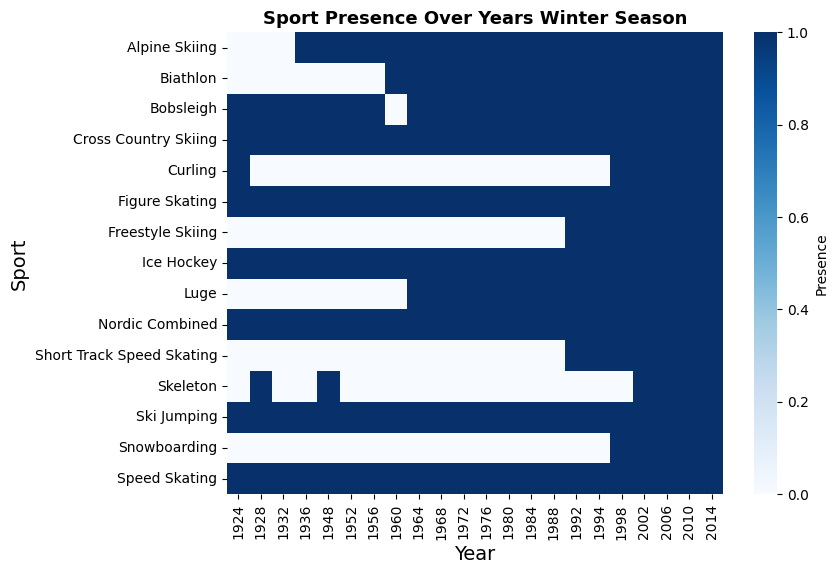

In [27]:
summer_presence_df = pd.DataFrame(0, index=kind_sport_winter_sort, columns=years_winter_sort)

for year in summer_presence_df.columns:
    summer_presence_df.loc[sport_winter_years_df['Sport'].loc[sport_winter_years_df['Year'] == year], year] = 1

plt.figure(figsize=(8, 6))
sns.heatmap(summer_presence_df, cmap='Blues', cbar_kws={'label': 'Presence'})

plt.title('Sport Presence Over Years Winter Season', fontsize=13, color='black', fontweight='bold')
plt.xlabel('Year', color='black', fontsize=14)
plt.ylabel('Sport', color='black', fontsize=14)

plt.show()

### Number of events each year

In [28]:
df_event_season = df.groupby(['Year', 'Season']).agg(Event_num = ('Event', 'nunique')).reset_index()

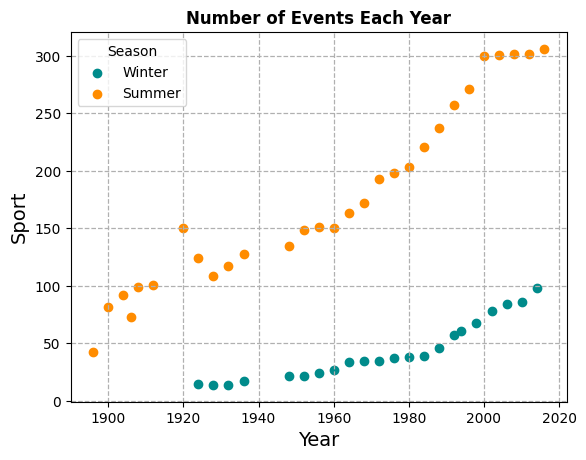

In [29]:
labels = ['Winter', 'Summer']
x_winter = (df_event_season.Year.loc[df_event_season.Season == 'Winter'])
x_summer = (df_event_season.Year.loc[df_event_season.Season == 'Summer'])
y_winter = (df_event_season.Event_num.loc[df_event_season.Season == 'Winter'])
y_summer = (df_event_season.Event_num.loc[df_event_season.Season == 'Summer'])

plt.scatter(x_winter, y_winter, color='darkcyan')
plt.scatter(x_summer, y_summer, color='darkorange')

plt.title('Number of Events Each Year', fontsize=12, color='black', fontweight='bold')
plt.xlabel('Year', color='black', fontsize=14)
plt.ylabel('Sport', color='black', fontsize=14)
plt.legend(labels, title="Season", loc="upper left")

plt.grid(linestyle='--', linewidth=0.9)
plt.show()

### Examining Wins by Weight

In [30]:
medal_filter = df_stats['Medal'].notna()

df_weight = df_stats.loc[medal_filter].groupby('Weight').agg(Gold_medal = ('Medal', lambda x: (x == 'Gold').sum()), 
                                                             Silver_medal = ('Medal', lambda x: (x == 'Silver').sum()),
                                                             Bronze_medal = ('Medal', lambda x: (x == 'Bronze').sum())
                                                            ).reset_index()

df_weight

,Weight,Gold_medal,Silver_medal,Bronze_medal
0,28.0,1,0,1
1,30.0,3,1,1
2,31.0,0,0,1
3,32.0,2,1,0
4,33.0,3,3,3
...,...,...,...,...
124,163.0,2,0,0
125,167.0,0,1,0
126,170.0,1,0,1
127,175.0,0,0,1


In [31]:
df_weight = df_weight.loc[(df_weight.Gold_medal > 0) & (df_weight.Silver_medal > 0) & (df_weight.Bronze_medal > 0)]
df_weight.sort_values('Gold_medal', ascending=False).head(10)

,Weight,Gold_medal,Silver_medal,Bronze_medal
41,70.0,424,413,431
46,75.0,387,396,399
44,73.0,308,304,304
51,80.0,304,305,333
39,68.0,294,341,320
43,72.0,293,283,320
31,60.0,288,327,316
36,65.0,274,286,285
48,77.0,272,226,236
49,78.0,260,247,280


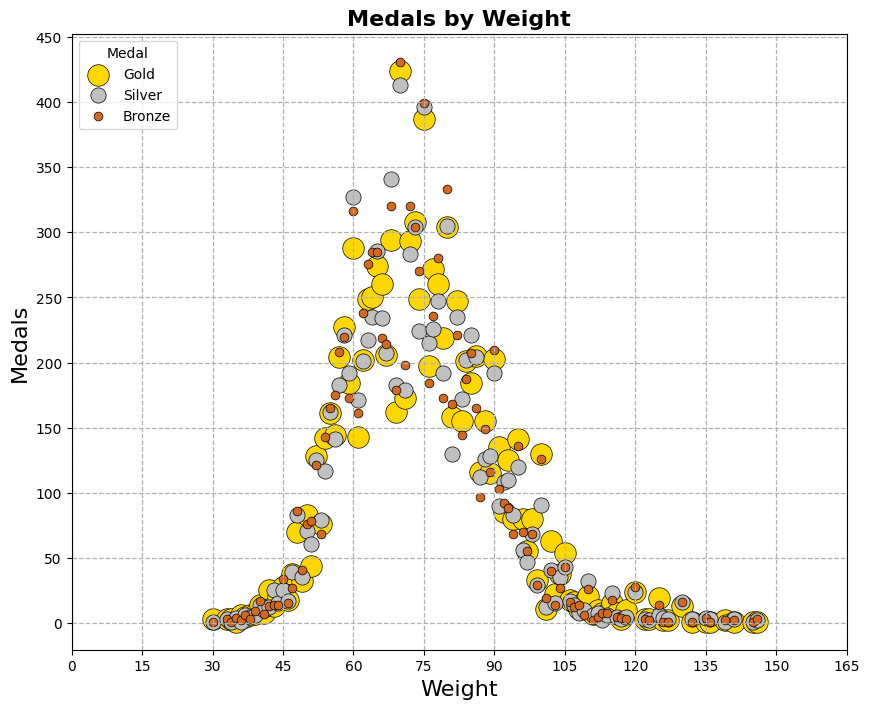

In [32]:
labels = ['Gold', 'Silver', 'Bronze']
bar_width = 0.25
plt.figure(figsize=(10, 8))
plt.scatter(df_weight.Weight, df_weight.Gold_medal, color='gold', edgecolor='black', s=240, linewidths=0.5)
plt.scatter(df_weight.Weight, df_weight.Silver_medal, color='silver', edgecolor='black', s=120, linewidths=0.5)
plt.scatter(df_weight.Weight, df_weight.Bronze_medal, color='chocolate', edgecolor='black', s=40, linewidths=0.5)

plt.xticks([i for i in range(0, 180, 15)])
plt.yticks([j for j in range(0, 500, 50)])

plt.title('Medals by Weight', fontsize=16, color='black', fontweight='bold')
plt.xlabel('Weight', color='black', fontsize=16)
plt.ylabel('Medals', color='black', fontsize=16)
plt.legend(labels, title="Medal", loc="upper left")

plt.grid(linestyle='--', linewidth=0.9)
plt.show()

#### Distribution of Athletes by Weight

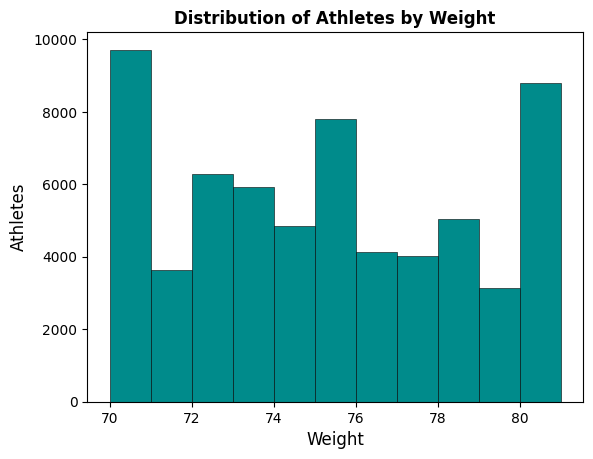

In [33]:
bins = 11
plt.hist(df.Weight.loc[(df.Weight >= 70) & (df.Weight <= 81)], edgecolor='black', linewidth=0.4 , bins=bins, color='darkcyan')

plt.title('Distribution of Athletes by Weight', fontsize=12, color='black', fontweight='bold')
plt.xlabel('Weight', color='black', fontsize=12)
plt.ylabel('Athletes', color='black', fontsize=12)

plt.show()

In [34]:
df.Weight.loc[df.Weight == 70].count()

9713

In [35]:
df.Weight.loc[df.Weight == 71].count()

3636

#### Top 10 Events for Every Weight

In [36]:
age_filter = (df.Weight >= 70) & (df.Weight <= 71)

event_weight = df.loc[age_filter].groupby(['Weight', 'Event']).agg(Weight_sum = ('Weight', 'count')).reset_index()
event_weight

,Weight,Event,Weight_sum
0,70.0,Alpine Skiing Men's Combined,5
1,70.0,Alpine Skiing Men's Downhill,34
2,70.0,Alpine Skiing Men's Giant Slalom,72
3,70.0,Alpine Skiing Men's Slalom,79
4,70.0,Alpine Skiing Men's Super G,12
...,...,...,...
739,71.0,"Wrestling Men's Lightweight, Greco-Roman",10
740,71.0,"Wrestling Men's Middleweight, Freestyle",1
741,71.0,"Wrestling Men's Welterweight, Freestyle",7
742,71.0,"Wrestling Men's Welterweight, Greco-Roman",1


In [37]:
event_weight.loc[event_weight.Weight == 71].sort_values(by='Weight_sum', ascending=False).head(10)

,Weight,Event,Weight_sum
484,71.0,Boxing Men's Light-Middleweight,211
568,71.0,Football Men's Football,126
528,71.0,"Cycling Men's Road Race, Individual",92
592,71.0,Judo Men's Lightweight,84
586,71.0,Hockey Men's Hockey,82
532,71.0,"Cycling Men's Team Pursuit, 4,000 metres",54
431,71.0,Athletics Men's 4 x 400 metres Relay,53
585,71.0,Handball Women's Handball,50
730,71.0,Volleyball Women's Volleyball,49
432,71.0,Athletics Men's 400 metres,46


In [38]:
event_weight.loc[event_weight.Weight == 70].sort_values(by='Weight_sum', ascending=False).head(10)

,Weight,Event,Weight_sum
193,70.0,Football Men's Football,324
214,70.0,Hockey Men's Hockey,191
146,70.0,"Cycling Men's Road Race, Individual",190
25,70.0,Athletics Men's 4 x 100 metres Relay,142
26,70.0,Athletics Men's 4 x 400 metres Relay,129
18,70.0,Athletics Men's 100 metres,118
391,70.0,Volleyball Women's Volleyball,115
33,70.0,Athletics Men's 800 metres,107
120,70.0,Cross Country Skiing Men's 4 x 10 kilometres R...,100
213,70.0,Handball Women's Handball,100


#### Martial arts

In [39]:
martial_arts = []
for i in list(event_weight.Event.unique()):
    if 'weight' in i:
        martial_arts.append(i)
martial_arts

["Boxing Men's Light-Middleweight",
 "Boxing Men's Middleweight",
 "Boxing Men's Welterweight",
 "Judo Men's Extra-Lightweight",
 "Judo Men's Half-Lightweight",
 "Judo Men's Half-Middleweight",
 "Judo Men's Lightweight",
 "Judo Men's Middleweight",
 "Judo Women's Half-Heavyweight",
 "Judo Women's Half-Middleweight",
 "Judo Women's Middleweight",
 "Rowing Men's Lightweight Coxless Fours",
 "Rowing Men's Lightweight Double Sculls",
 'Sailing Mixed Two Person Heavyweight Dinghy',
 "Taekwondo Men's Featherweight",
 "Taekwondo Men's Flyweight",
 "Taekwondo Women's Heavyweight",
 "Taekwondo Women's Welterweight",
 "Weightlifting Men's Lightweight",
 "Weightlifting Men's Middleweight",
 "Weightlifting Women's Light-Heavyweight",
 "Wrestling Men's Featherweight, Freestyle",
 "Wrestling Men's Featherweight, Greco-Roman",
 "Wrestling Men's Lightweight, Freestyle",
 "Wrestling Men's Lightweight, Greco-Roman",
 "Wrestling Men's Middleweight A, Greco-Roman",
 "Wrestling Men's Middleweight, Greco-Ro

In [40]:
event_weight_arts = event_weight.loc[event_weight.Event.isin(martial_arts)]

In [41]:
event_weight_arts

,Weight,Event,Weight_sum
90,70.0,Boxing Men's Light-Middleweight,31
91,70.0,Boxing Men's Middleweight,8
92,70.0,Boxing Men's Welterweight,9
218,70.0,Judo Men's Extra-Lightweight,2
219,70.0,Judo Men's Half-Lightweight,14
220,70.0,Judo Men's Half-Middleweight,34
221,70.0,Judo Men's Lightweight,17
222,70.0,Judo Men's Middleweight,1
223,70.0,Judo Women's Half-Heavyweight,7
224,70.0,Judo Women's Half-Middleweight,7


In [42]:
event_weight_arts.groupby('Weight').sum().reset_index()

,Weight,Event,Weight_sum
0,70.0,Boxing Men's Light-MiddleweightBoxing Men's Mi...,539
1,71.0,Boxing Men's FlyweightBoxing Men's Heavyweight...,455


#### Medals by Weight Over the Years

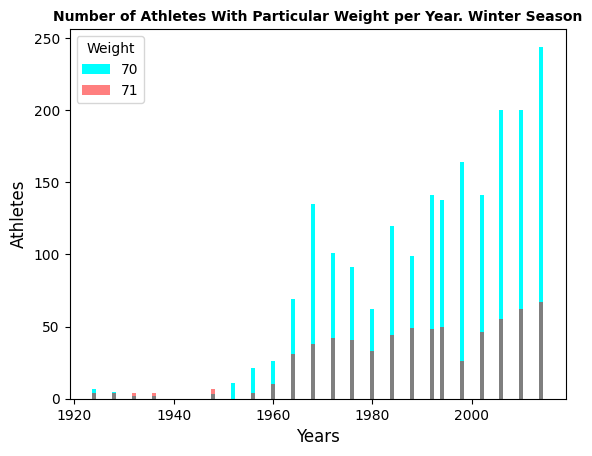

In [43]:
winter_71_kg = df.Weight.loc[(df.Weight == 71) & (df.Season == 'Winter')].groupby(df.Year).count().reset_index()
winter_70_kg = df.Weight.loc[(df.Weight == 70) & (df.Season == 'Winter')].groupby(df.Year).count().reset_index()
plt.bar(winter_70_kg.Year, winter_70_kg.Weight, color = 'cyan')
plt.bar(winter_71_kg.Year, winter_71_kg.Weight, color='red', alpha = 0.5)

labels = (70,71)
plt.title('Number of Athletes With Particular Weight per Year. Winter Season', fontsize=10, color='black', fontweight='bold')
plt.xlabel('Years', color='black', fontsize=12)
plt.ylabel('Athletes', color='black', fontsize=12)
plt.legend(labels, title="Weight", loc="upper left")

plt.show()

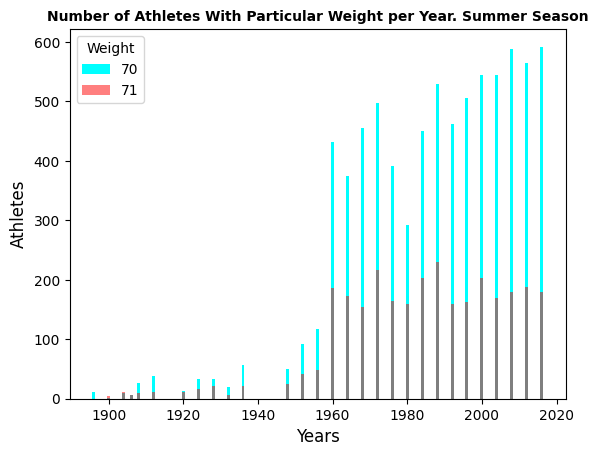

In [44]:
summer_71_kg  = df.Weight.loc[(df.Weight == 71) & (df.Season == 'Summer')].groupby(df.Year).count().reset_index()
summer_70_kg = df.Weight.loc[(df.Weight == 70) & (df.Season == 'Summer')].groupby(df.Year).count().reset_index()
plt.bar(summer_70_kg.Year, summer_70_kg.Weight, color = 'cyan')
plt.bar(summer_71_kg.Year, summer_71_kg.Weight, color='red', alpha=0.5)

labels = (70,71)
plt.title('Number of Athletes With Particular Weight per Year. Summer Season', fontsize=10, color='black', fontweight='bold')
plt.xlabel('Years', color='black', fontsize=12)
plt.ylabel('Athletes', color='black', fontsize=12)
plt.legend(labels, title="Weight", loc="upper left")

plt.show()

#### Distribution of Athletes by Weight(60-90 kg)

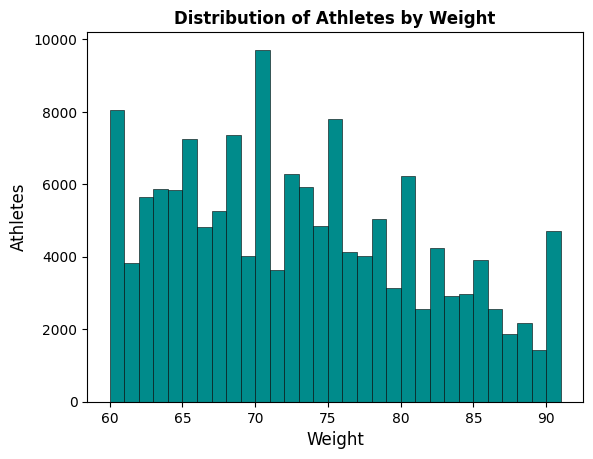

In [45]:
bins = 31
plt.hist(df.Weight.loc[(df.Weight >= 60) & (df.Weight <= 91)], edgecolor='black', linewidth=0.4 , bins=bins, color='darkcyan')

plt.title('Distribution of Athletes by Weight', fontsize=12, color='black', fontweight='bold')
plt.xlabel('Weight', color='black', fontsize=12)
plt.ylabel('Athletes', color='black', fontsize=12)

plt.show()

### Examining Wins by Height 

In [46]:
medal_filter = df_stats['Medal'].notna()

df_height = df_stats.loc[medal_filter].groupby('Height').agg(Gold_medal = ('Medal', lambda x: (x == 'Gold').sum()), 
                                                             Silver_medal = ('Medal', lambda x: (x == 'Silver').sum()),
                                                             Bronze_medal = ('Medal', lambda x: (x == 'Bronze').sum())
                                                            ).reset_index()

df_height

,Height,Gold_medal,Silver_medal,Bronze_medal
0,136.0,3,1,1
1,137.0,1,0,1
2,138.0,1,0,0
3,139.0,3,0,1
4,140.0,2,1,4
...,...,...,...,...
81,217.0,0,3,1
82,218.0,0,4,2
83,219.0,1,0,0
84,220.0,1,0,2


In [47]:
df_height = df_height.loc[(df_height.Gold_medal > 0) & (df_height.Silver_medal > 0) & (df_height.Bronze_medal > 0)]
df_height

,Height,Gold_medal,Silver_medal,Bronze_medal
0,136.0,3,1,1
4,140.0,2,1,4
6,142.0,5,5,3
7,143.0,5,1,4
8,144.0,3,3,1
...,...,...,...,...
74,210.0,5,6,7
75,211.0,8,6,1
77,213.0,7,6,1
78,214.0,1,1,2


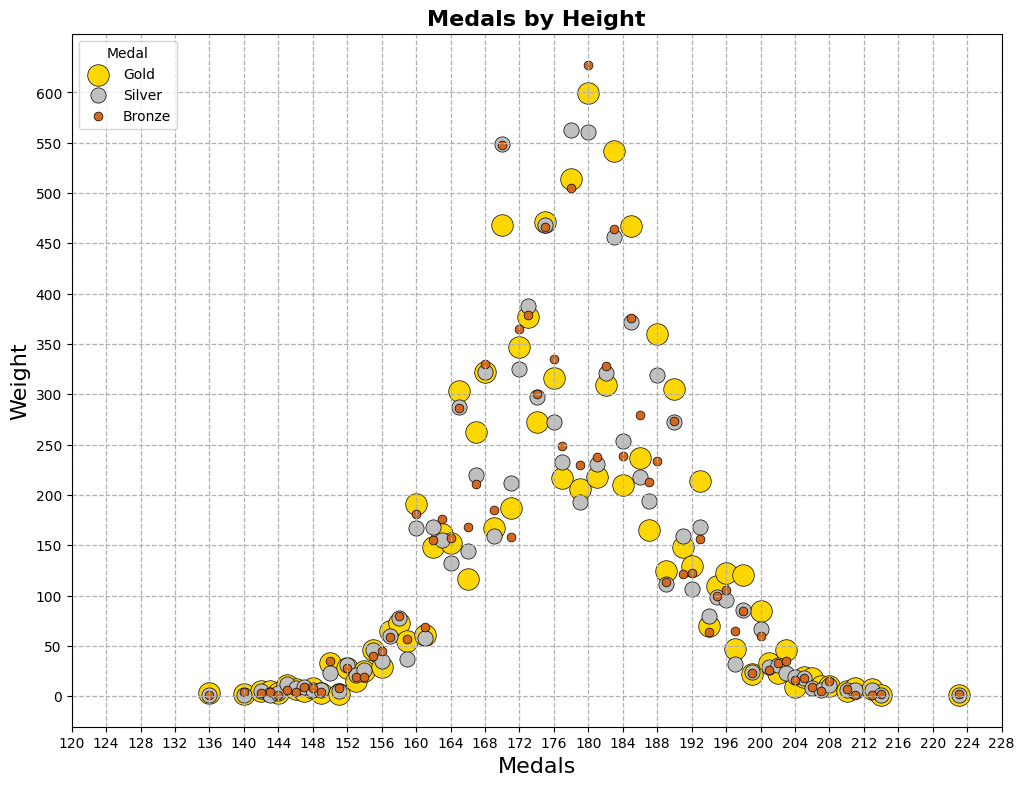

In [48]:
labels = ['Gold', 'Silver', 'Bronze']

plt.figure(figsize=(12,9))

plt.scatter(df_height.Height, df_height.Gold_medal, color='gold', edgecolor='black', s=240, linewidths=0.5)
plt.scatter(df_height.Height, df_height.Silver_medal, color='silver', edgecolor='black', s=120, linewidths=0.5)
plt.scatter(df_height.Height, df_height.Bronze_medal, color='chocolate', edgecolor='black', s=40, linewidths=0.5)

plt.xticks([i for i in range(120, 232, 4)])
plt.yticks([i for i in range(0, 650, 50)])

plt.title('Medals by Height', fontsize=16, color='black', fontweight='bold')
plt.xlabel('Medals', color='black', fontsize=16)
plt.ylabel('Weight', color='black', fontsize=16)
plt.legend(labels, title="Medal", loc="upper left")

plt.grid(linestyle='--', linewidth=0.9)
plt.show()

### Golden years for athletes

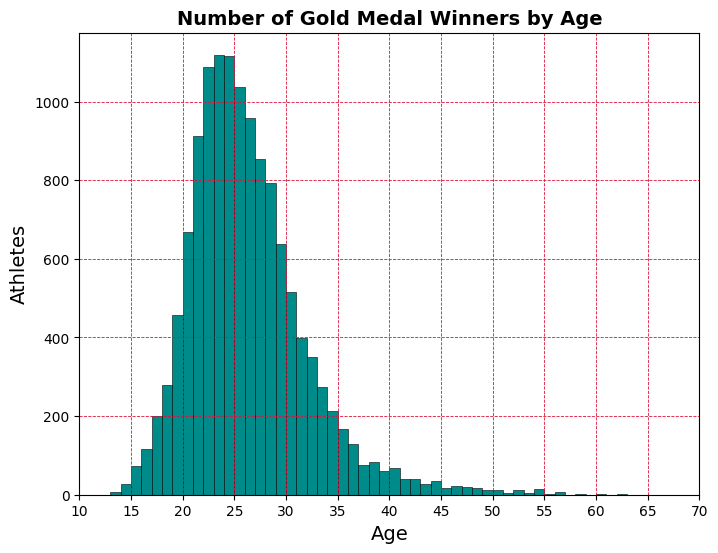

In [49]:
plt.figure(figsize=(8, 6))

plt.hist(age_medal_df.Age, bins=50, weights=age_medal_df.Gold, color='darkcyan', edgecolor='black', linewidth=0.4)

plt.title('Number of Gold Medal Winners by Age', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Age', color='black', fontsize=14)
plt.ylabel('Athletes', color='black', fontsize=14)
plt.xticks(range(10,75, 5))

plt.grid(linestyle='--', linewidth=0.6, color='crimson')
plt.show()

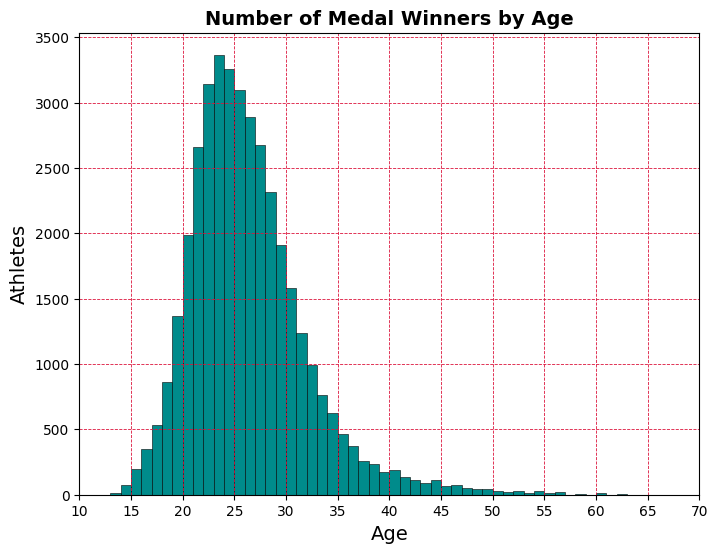

In [50]:
plt.figure(figsize=(8, 6))

plt.hist(age_medal_df.Age, bins=50, weights=age_medal_df.Medal_sum, color='darkcyan', edgecolor='black', linewidth=0.4)

plt.title('Number of Medal Winners by Age', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Age', color='black', fontsize=14)
plt.ylabel('Athletes', color='black', fontsize=14)
plt.xticks(range(10,75, 5))

plt.grid(linestyle='--', linewidth=0.6, color='crimson')
plt.show()

### Comparing Prizes by Age

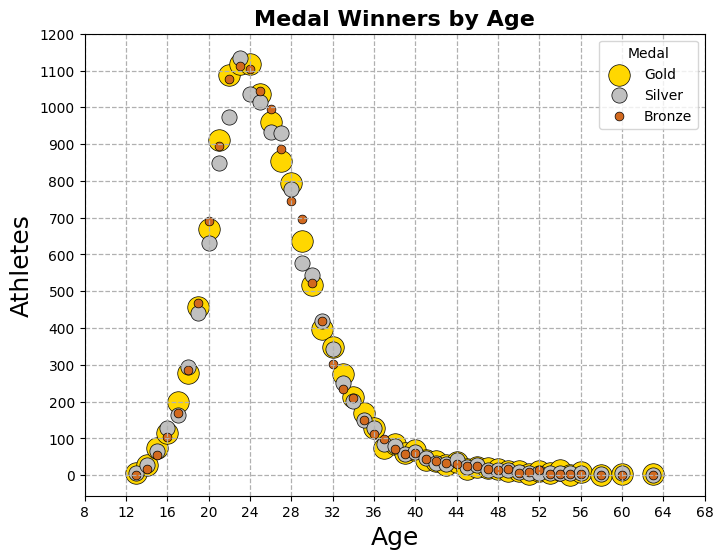

In [51]:
labels = ['Gold', 'Silver', 'Bronze']

plt.figure(figsize=(8, 6))

plt.scatter(age_medal_df.Age, age_medal_df.Gold, color='gold', edgecolor='black', s=240, linewidths=0.5)
plt.scatter(age_medal_df.Age, age_medal_df.Silver, color='silver', edgecolor='black', s=120, linewidths=0.5)
plt.scatter(age_medal_df.Age, age_medal_df.Bronze, color='chocolate', edgecolor='black', s=40, linewidths=0.5)

plt.xticks([i for i in range(8, 69, 4)])
plt.yticks([j for j in range(0, 1300, 100)])

plt.title('Medal Winners by Age', fontsize=16, color='black', fontweight='bold')
plt.xlabel('Age', color='black', fontsize=18)
plt.ylabel('Athletes', color='black', fontsize=18)
plt.legend(labels, title="Medal", loc="upper right")

plt.grid(linestyle='--', linewidth=0.9)
plt.show()

### Exploring Athletes by Age

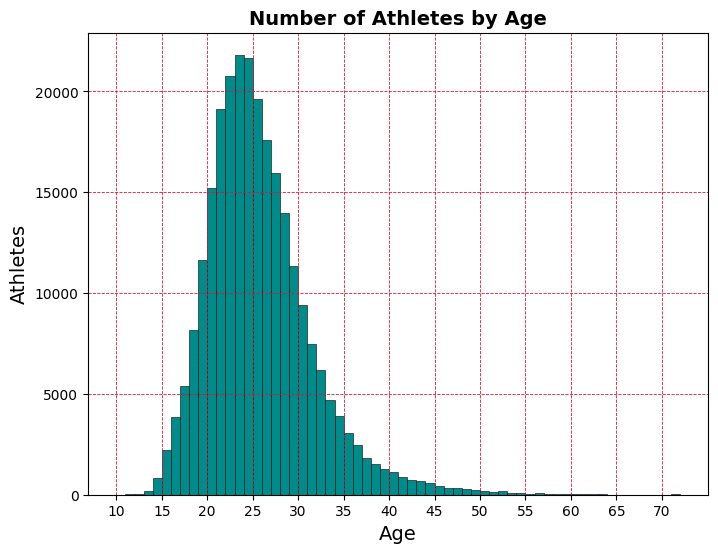

In [52]:
plt.figure(figsize=(8, 6))

plt.hist(df_stats.Age, bins=62, edgecolor='black', linewidth=0.4, color='darkcyan')

plt.title('Number of Athletes by Age', fontsize=14, color='black', fontweight='bold')
plt.xlabel('Age', color='black', fontsize=14)
plt.ylabel('Athletes', color='black', fontsize=14)
plt.xticks(range(10,75, 5))

plt.grid(linestyle='--', linewidth=0.6, color='crimson')
plt.show()

### Determining Sports with the Most Wins for Younger Athletes

In [53]:
age_filter = (df_stats.Age >= 21) & (df_stats.Age <= 27) 
medal_filter = df_stats.Medal

event_young = df_stats.loc[age_filter & medal_filter].groupby('Event').agg(Gold_medal = ('Medal', lambda x: (x == 'Gold').sum()), 
                                                                   Silver_medal = ('Medal', lambda x: (x == 'Silver').sum()), 
                                                                   Bronze_medal = ('Medal', lambda x: (x == 'Bronze').sum()), 
                                                                   Win_sum = ('Medal', 'count')
                                                                  ).reset_index()

event_young

,Event,Gold_medal,Silver_medal,Bronze_medal,Win_sum
0,Alpine Skiing Men's Combined,7,8,6,21
1,Alpine Skiing Men's Downhill,12,13,12,37
2,Alpine Skiing Men's Giant Slalom,12,12,11,35
3,Alpine Skiing Men's Slalom,15,12,10,37
4,Alpine Skiing Men's Super G,3,5,5,13
...,...,...,...,...,...
643,"Wrestling Women's Flyweight, Freestyle",3,3,4,10
644,"Wrestling Women's Heavyweight, Freestyle",2,2,3,7
645,"Wrestling Women's Light-Heavyweight, Freestyle",1,1,1,3
646,"Wrestling Women's Lightweight, Freestyle",2,2,5,9


In [54]:
event_young_filt = event_young.sort_values('Win_sum' ,ascending = False).head(10)

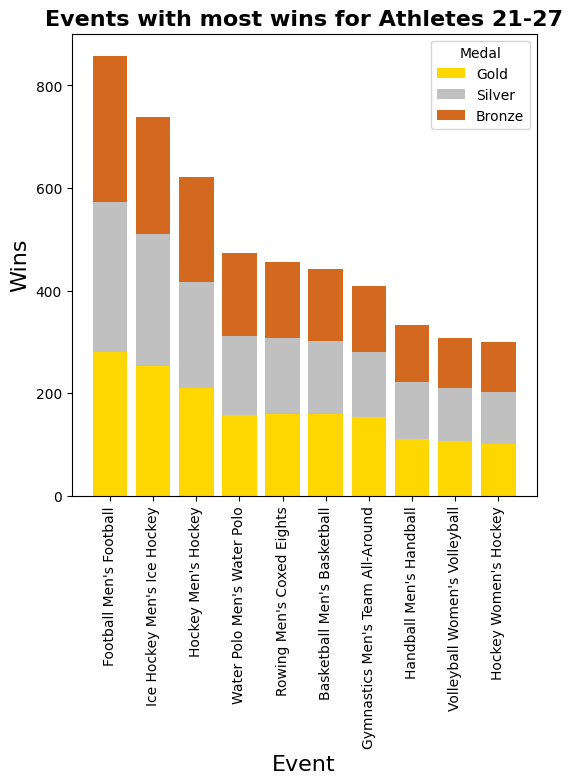

In [55]:
labels = ['Gold', 'Silver', 'Bronze']

plt.figure(figsize = (6,6))

plt.bar(event_young_filt.Event, event_young_filt.Gold_medal, color = 'gold')
plt.bar(event_young_filt.Event, event_young_filt.Silver_medal, bottom = event_young_filt.Gold_medal, color = 'silver')
plt.bar(event_young_filt.Event, event_young_filt.Bronze_medal, bottom = np.array(event_young_filt.Silver_medal) + np.array(event_young_filt.Gold_medal), color = 'chocolate')

plt.xticks(rotation = 90)

plt.title('Events with most wins for Athletes 21-27', fontsize = 16, color = 'black', fontweight = 'bold')
plt.xlabel('Event', color = 'black', fontsize = 16)
plt.ylabel('Wins', color = 'black', fontsize = 16)
plt.legend(labels, title="Medal", loc="upper right")

plt.show()

### Identifying Sports with the Most Wins for Athletes 40+

In [56]:
age_filter = df_stats.Age >= 40
medal_filter = df_stats.Medal

event_old = df_stats.loc[age_filter & medal_filter].groupby('Event').agg(Gold_medal = ('Medal', lambda x: (x == 'Gold').sum()), 
                                                                   Silver_medal = ('Medal', lambda x: (x == 'Silver').sum()), 
                                                                   Bronze_medal = ('Medal', lambda x: (x == 'Bronze').sum()), 
                                                                   Win_sum = ('Medal', 'count')
                                                                  ).reset_index()

event_old.head(2)

,Event,Gold_medal,Silver_medal,Bronze_medal,Win_sum
0,"Archery Men's Au Chapelet, 33 metres",0,0,1,1
1,"Archery Men's Au Chapelet, 50 metres",1,0,0,1


In [57]:
event_old_filt = event_old.sort_values('Win_sum' ,ascending = False).head(10)

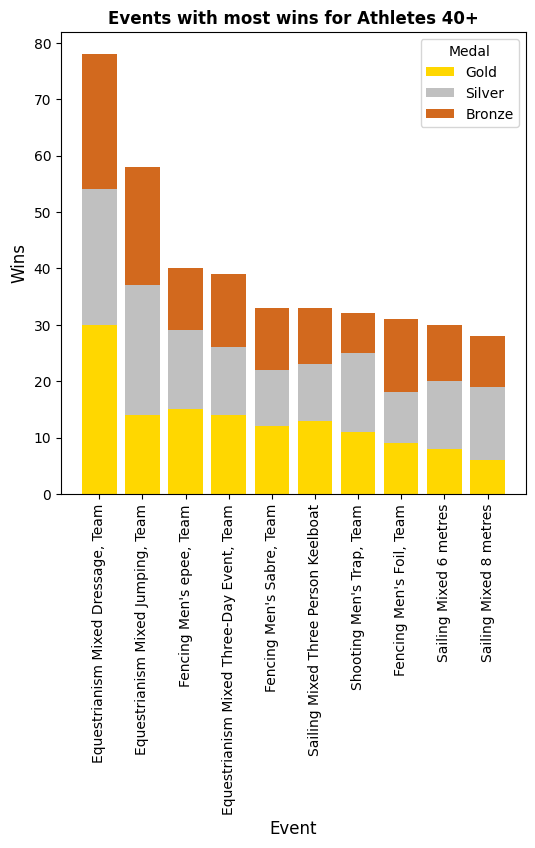

In [58]:
labels = ['Gold', 'Silver', 'Bronze']

plt.figure(figsize = (6, 6))

plt.bar(event_old_filt.Event, event_old_filt.Gold_medal, color = 'gold')
plt.bar(event_old_filt.Event, event_old_filt.Silver_medal, bottom = event_old_filt.Gold_medal, color = 'silver')
plt.bar(event_old_filt.Event, event_old_filt.Bronze_medal, bottom = np.array(event_old_filt.Silver_medal) + np.array(event_old_filt.Gold_medal), color = 'chocolate')

plt.xticks(rotation=90)

plt.title('Events with most wins for Athletes 40+', fontsize = 12, color = 'black', fontweight = 'bold')
plt.xlabel('Event', color='black', fontsize = 12)
plt.ylabel('Wins', color='black', fontsize = 12)
plt.legend(labels, title="Medal", loc="upper right")

plt.show()